# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
np.__version__

'1.21.5'

### Importing the training set

In [15]:
dataset_train = pd.read_csv('DATA/Google_Stock_Price_Train.csv')
training_set = dataset_train['Open'].values.reshape(-1,1)

### Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_set_scaled = scaler.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [20]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [22]:
import tensorflow

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout 

### Initialising the RNN

In [24]:
regressor = Sequential()

2022-09-21 08:25:22.780062: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Adding the first LSTM layer and some Dropout regularisation

In [25]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60, 1)))
regressor.add(Dropout(0.2))
LSTM

keras.layers.rnn.lstm.LSTM

### Adding a second LSTM layer and some Dropout regularisation

In [26]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [27]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [28]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [29]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [30]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [32]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 85ms/step - loss: 0.0461
Epoch 2/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0071
Epoch 3/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0052
Epoch 11/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0040
Epoch 13/100
38/38 [=====

38/38 [==============================] - 4s 93ms/step - loss: 0.0015


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [36]:
dataset_test = pd.read_csv('DATA/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [37]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


### Visualising the results

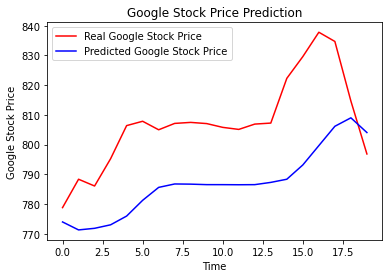

In [38]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()